Liste des points : [(500.0, 500.0), (506, 367), (391, 619), (831, 705), (641, 546), (316, 754), (384, 44), (308, 545), (932, 513), (670, 542), (938, 847), (562, 828), (430, 563), (418, 537), (488, 563), (24, 296), (49, 813), (837, 907), (82, 13), (572, 529), (711, 941)]
Matrice d'adjacence 
 [[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 

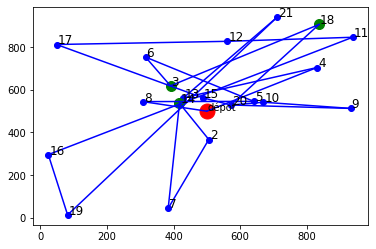

In [11]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

def pointGeneration(nb):
    n = nb
    scale = 50*n
    maxJoint = 1

    depot = (scale/2,scale/2)
    pointList = [depot]
    
    for i in range(n):
        pointList += (i,)
        pointList[i+1] = (random.randrange(0,scale),random.randrange(0,scale))
        
    return pointList
#------------------------------------------------------------------------------------
def plotPoints(pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)
    for i in range(len(pointList)):
        if (i!= 0):
            plt.plot(pointList[i][0], pointList[i][1],"bo")
            plt.annotate(i+1, (pointList[i][0]+3, pointList[i][1]+3), fontsize=12)
#------------------------------------------------------------------------------------
def randomPackages(nb, nbPointsMax):
    package = random.sample(range(1, nbPointsMax), nb)
    for i in range(len(package)):
        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)
    return package

        
#------------------------------------------------------------------------------------
def makematrix(liste, linksLimit):
    matrix = np.zeros((len(liste),len(liste)))
    for i in range(len(matrix)):
        if i < len(matrix):
            while(sum(matrix[i])<linksLimit):
                #print(i)
                nbchoisi = np.random.randint(i,len(matrix))
                matrix[i][nbchoisi] = 1
                matrix[nbchoisi][i] = 1
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

            
def TraceLinks(matrix):
    # Pour chaque points, on trace une ligne avec chaque voisins
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if(i>j):
                if matrix[i][j] > 0:
                    x = (pointList[i][0], pointList[j][0])
                    y = (pointList[i][1], pointList[j][1])
                    plt.plot(x, y,"b", linestyle="solid")

                    
#------------------------------------------------------------------------------------
def ponderation(pointList, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                poids = np.sqrt((pointList[i][0]-pointList[j][0])**2+(pointList[i][1]-pointList[j][1])**2)
                matrix[i][j] = poids
                matrix[j][i]
                
                
#------------------------------------------------------------------------------------------------------------------------------------
nbPoints = 20
pointList = pointGeneration(nbPoints) 
print("Liste des points :", pointList)

plotPoints(pointList)
randomPackages(3, nbPoints)
nbvoisins = 2
matrix = makematrix(pointList, nbvoisins)
print("Matrice d'adjacence \n", matrix)
ponderation (pointList,matrix)
print("Matrice d'adjacence pondérée \n", matrix)
TraceLinks(matrix)


In [ ]:
#verif la presence de tous les elements de la table1 dans la table 2

def verifPresenceElemtable1_In_table2(elemsAVerifier, TableauEntier):
    for e in elemsAVerifier:
        if(not(e in TableauEntier)):
            return False
    return True
    
def lookPathInTree(n, arbreLocation): #recursivité pour chercher un chemin vers un point dans l'arbre de PCM
    if(n == arbreLocation[0][0]):
        path = n
        return path
    if(arbreLocation[0][1] == []):
        return None
    for i in arbreLoc[0]:
        if(n == i[0]):
            Path = [n]
            return Path
        else:
            ret = lookPathInTree(n,arbreLocation[0][i])
            if (ret != None):
                path += ret
                return path
            
    
    
def solutionLocaleTree(matrice, liste_pt_livraisons):
    indice_depot = 0
    indice_actuel = indice_depot
    liste_parcourus = [indice_actuel]
    livraisons = liste_pt_livraisons
    arbre[[indice_actuel,[]]]
    while(not(verifPresenceElemtable1_In_table2(livraisons,liste_parcourus))):
        liste_tuple_pointValeur_minimum = []
        for(p in liste_parcourus):
            valeur_minimum = None
            for j in p:
                if(matrice[p][j] >0 and matrice[p][j] < valeur_minimum and i != j)
                    mini = matrice[p][j]
                    look
                    arbre[p][1].append([j,[]])
                    
        
            #verifier le minimum et le mettre avec le bon indice dans la matrice, l'indice ligne et colonne qu'on voie
        
        